# Ch05. Regression

### 5.4 보스턴 주택 가격 예측

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [2]:
from scipy import stats
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
bostonDF = pd.DataFrame(boston.data, columns= boston.feature_names)
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


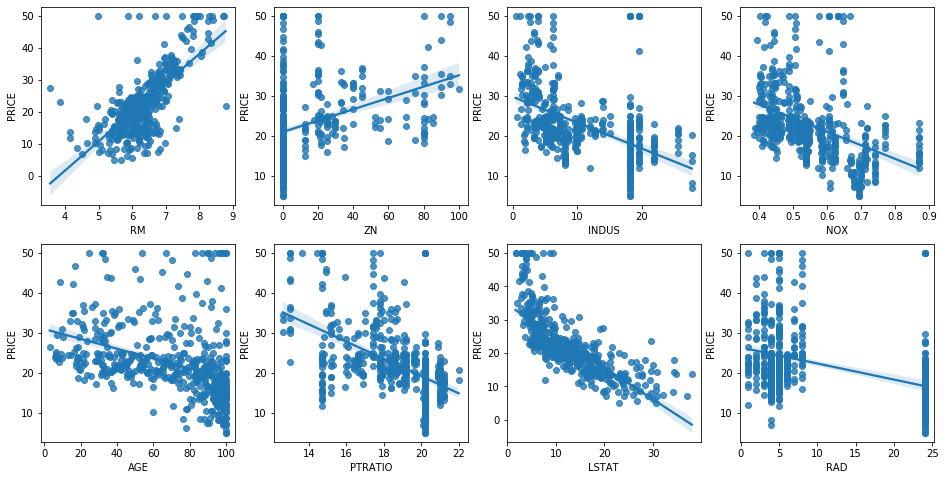

In [5]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
im_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(im_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y="PRICE", data=bostonDF, ax=axs[row][col])

In [6]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 단일 변수에 대한 선형 회귀

In [8]:
x = bostonDF['RM']
y = boston.target

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2019)

In [10]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

- 모델 학습하기

In [11]:
sim_lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 결과 예측하기

In [12]:
y_pred = sim_lr.predict(x_test.values.reshape(-1,1))

- 결과 확인하기

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1795128921483402

- 계수 w(weight), 절편  b(bias)

In [14]:
sim_lr.coef_, sim_lr.intercept_

(array([9.99002801]), -40.094059576934114)

- 도출한 회귀식 PRICE = 9.99 * RM - 40.09

- 산점도, 회귀선 그리기

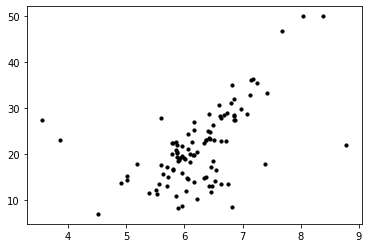

In [15]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.show()

In [16]:
line_x = np.linspace(np.min(x_test), np.max(x_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

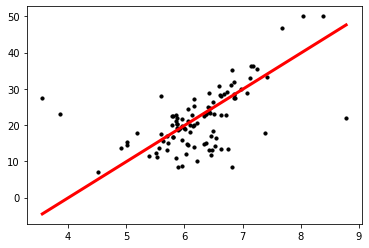

In [17]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.show()

In [22]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = [4,8]
y1 = 4 * w + b
y2 = 8 * w + b

In [19]:
# w = sim_lr.coef_[0]
# b = sim_lr.intercept_
# xs = np.array([4,8])
# ys = xs * w +b

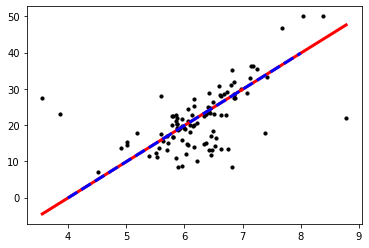

In [23]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.plot(xs, [y1,y2], c='blue', lw=3, ls='--')
plt.show()

In [24]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


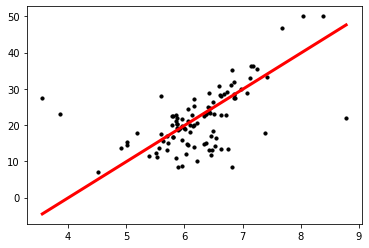

In [25]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.show()

In [26]:
xx = bostonDF['PRICE']
yy = boston.target

In [27]:
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=19)

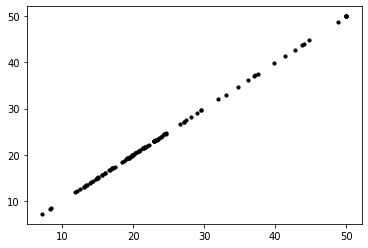

In [28]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.show()

In [29]:
line_xx = np.linspace(np.min(x_test), np.max(x_test), 10)
line_yy = sim_lr.predict(line_xx.reshape(-1,1))

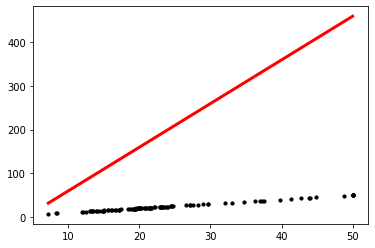

In [30]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_xx, line_yy, c='red', lw=3)
plt.show()

In [74]:
xxx = bostonDF['PRICE']
yyy =  bostonDF['LSTAT']

In [114]:
x_train, x_test, y_train, y_test = train_test_split(xxx, yyy, test_size=0.2, random_state=19)

In [76]:
# from sklearn.linear_model import LinearRegression
# sim_lr = LinearRegression()

In [77]:
sim_lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
y_pred = sim_lr.predict(x_test.values.reshape(-1,1))

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5231032444464312

In [80]:
sim_lr.coef_, sim_lr.intercept_

(array([-0.55768229]), 25.241601501515532)

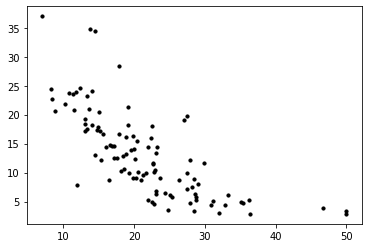

In [81]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.show()

In [82]:
line_x = np.linspace(np.min(x_test), np.max(x_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

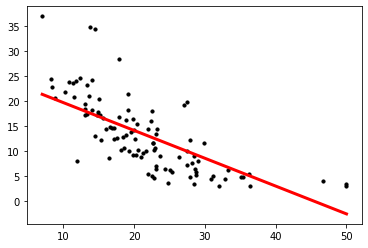

In [83]:
plt.scatter(x_test, y_test, s=10, c='k')
plt.plot(line_x, line_y, c='red', lw=3)
plt.show()

### Decision Tree regressor

In [115]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)

In [116]:
from sklearn.metrics import mean_squared_error

In [117]:
dt_regr.fit(x_train.values.reshape(-1,1), y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [118]:
y_pred_dt = dt_regr.predict(x_test.values.reshape(-1,1))

In [119]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

In [120]:
rmse

3.669052081135362

In [121]:
from sklearn.svm import SVR
svr_rege = SVR()

In [122]:
svr_rege.fit(x_train.values.reshape(-1,1), y_train)
y_pred_svm = svr_rege.predict(x_test.values.reshape(-1,1))
rmse_svm = np.round(np.sqrt(mean_squared_error(y_test, y_pred_svm)), 2)

In [125]:
print(rmse_svm, rmse_lr)


3.48 4.31


### 1. Liner Regression

In [124]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train.values.reshape(-1,1), y_train)
y_pred = slr.predict(x_test.values.reshape(-1,1))
rmse_lr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)